## Python statistics essential training - 4.3 Bootstrapping

## By Patrick Li 🌰 
19 Dec，2018

Grades collected when asking people to give the mayor a grade between zero and ten.

In [1]:
import math
import io

In [15]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('data/grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


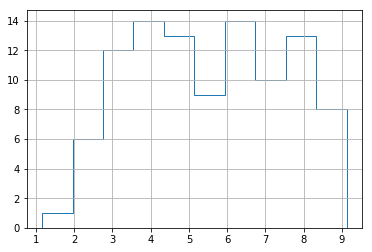

In [7]:
pop['grade'].hist(histtype = 'step')

In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


* The histogram has no recognizable simple form, but the mean for the sample is 5.5.
* What can we say about the true mean value. This time we cannot build a confidence interval by simulating the sampling distribution, because we do not know how to describe it. And, indeed, given the observed histogram it is unlikely that it has a simple form such as a normal distribution.
* However, we can still use computing by adopting a powerful idea in modern statistics, bootstrapping, which was introduced by Efron in 1979.
* I will estimate the uncertainty of our statistic, the mean, by generating a large family of samples from the one we have. And then, characterzing the distribution of the mean over this family. Each sample in the family is prepared as follow: we draw grades randomly for our single existing sample, allowing the same grade to be drawn more than once. Tachnically speaking, we are sampling with replacement.

In [9]:
pop.sample(100,replace = True).describe()

,grade
count,100.000000
mean,5.386636
std,2.230100
min,1.160899
25%,3.648651
50%,5.342877
75%,7.725864
max,9.120705


In [12]:
# Generate a bootstrap sample, take the mean, repeat this for 1000 times using a Python list comprehension.
# then fold this into a dataframe, call the variable 'meangrade'.
# Remember, they are not grades but they are means of grades.
bootstrap = pd.DataFrame({'meangrade' : [pop.sample(100,replace = True).grade.mean() for i in range (1000)]})

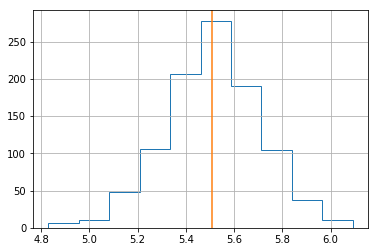

In [16]:
bootstrap.meangrade.hist(histtype ='step')
# show the origin mean drawn as a line on top of this
plt.axvline(pop.grade.mean(), color = 'C1')

#### * There is significant spread around the origin mean.
#### * Extract the quantiles.

In [17]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)
# it is between 5.1 and 5.9, it seems that the mean grade is likely to be a passing one.

(5.115924217074841, 5.89690047048326)

* The bootstrap procedure requires that the sample you have is representative.
* And the procedure is justified by a rather complex mathematics and the rather general assumptions.
* For this case, I will show you that the guess is acceptable by showing you how I really generated the data set. The distribution that I used was actually a sum of two normal distributions with equal weights. We can use scipy.stats to handle the play with distributions.


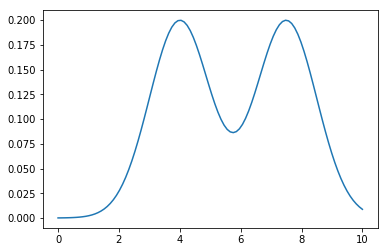

In [19]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x= np.linspace(0, 10, 100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))
# pdf returns the probablity density

This is a bimodal distribution. I truncated this distribution because there can't be grades below 0 or above 10.

In [20]:
# made a function to drop a simple grade
# use rvs for a scipy stats distribution object, just so it turns a random sample from that distribution, and I need to 
# choose between the two which I do just by drawing a uniform distribution number between 0 and 1, and comparing 
# it with 0.5, then I truncate.
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [21]:
draw()

6.195100325400839

### continuous drawing until I get a sample that acceptable

In [32]:
# make a data set by calling this repeatedly.
def dataset(n):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

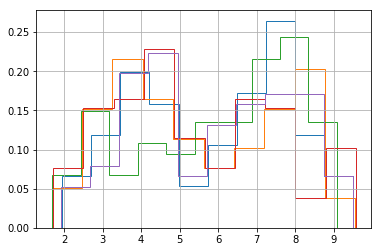

In [33]:
# histogram a few of these samples.for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

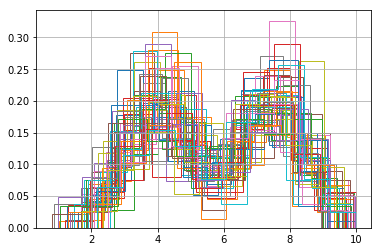

In [26]:
# histogram a few of these samples.
for i in range(50):
    dataset(100).grade.hist(histtype='step',density=True)

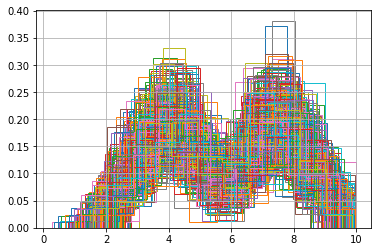

In [28]:
for i in range(500):
    dataset(100).grade.hist(histtype='step',density=True)

In [29]:
# As for the sampling distribution of the mean, we can use sumulation in as straightforward way.
means = pd.DataFrame({'meangrade': [dataset(1000).grade.mean() for i in range(1000)]})
# bolow is the code for bootstrap :
# bootstrap = pd.DataFrame({'meangrade' : [pop.sample(100,replace = True).grade.mean() for i in range (1000)]})
# the larger n the more precise result

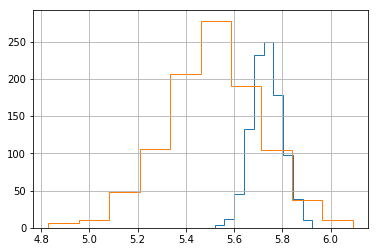

In [30]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')
# compare the two distributions

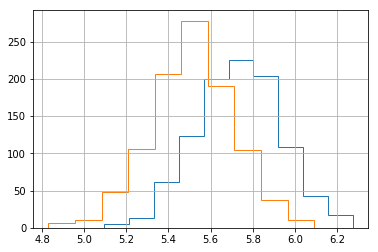

In [31]:
# As for the sampling distribution of the mean, we can use sumulation in as straightforward way.
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})
# bolow is the code for bootstrap :
# bootstrap = pd.DataFrame({'meangrade' : [pop.sample(100,replace = True).grade.mean() for i in range (1000)]})
# the larger n the more precise result
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')
# compare the two distributions

The estimated variance justified.